In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score





In [25]:
#df_st = pd.read_csv('../data/raw/Orig_Fitbit_ST.csv')

In [26]:
df = pd.read_csv('../data/raw/Orig_Fitbit_HR.csv')

In [27]:
df.head()

,datetime,heartrate
0,2025-11-28 00:00:10,62
1,2025-11-28 00:00:20,61
2,2025-11-28 00:00:25,63
3,2025-11-28 00:00:30,65
4,2025-11-28 00:00:35,66


In [28]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [29]:
df['year'] = df['datetime'].dt.year.astype(str)
df['month'] = df['datetime'].dt.month.astype(str)
df['day'] = df['datetime'].dt.day.astype(str)


In [30]:
df_day_min = df.groupby(['year', 'month', 'day'])['heartrate'].agg('idxmin').reset_index()

In [31]:
df_day_min = df_day_min.sort_values('heartrate').reset_index()

In [46]:
df_day_min = df_day_min.rename(columns= {'heartrate': 'index of min'})

In [47]:
df_day_min.drop(columns=['level_0', 'index'], inplace=True)

In [48]:
df_day_min

,year,month,day,index of min
0,2025,11,28,1248
1,2025,11,29,19607
2,2025,11,30,36661
3,2025,12,1,37984
4,2025,12,2,57664
...,...,...,...,...
179,2026,5,26,2124897
180,2026,5,27,2138533
181,2026,5,28,2149382
182,2026,5,29,2152896


In [132]:
time = 1000
df_final = pd.DataFrame({'Time': [], 'Temp': []})

for i in df_day_min.index:
    #find the index of the local minimum for the day as location. 
    location = df.loc[df.index == df_day_min['index of min'][i]].index.to_numpy()
    #Take a mean of of the temperatures before and after the min according to 'time'
    df_final.loc[i] = str(df['datetime'].loc[location]).split()[1] + ' ' + str(df['datetime'].loc[location]).split()[2], round(df['heartrate'].iloc[int(location)-time:int(location)+time].mean(), 2)
    #Take the time of the min value.
    #df_final['Time'].loc[i] = df['datetime'].loc[location]
    
df_final

,Time,Temp
0,2025-11-28 02:22:41,65.76
1,2025-11-29 13:28:30,74.17
2,2025-11-30 23:53:08,59.36
3,2025-12-01 02:53:52,79.97
4,2025-12-02 19:24:00,69.72
...,...,...
179,2026-05-26 11:52:21,71.49
180,2026-05-27 14:14:58,88.02
181,2026-05-28 18:28:17,76.04
182,2026-05-29 01:32:10,77.35


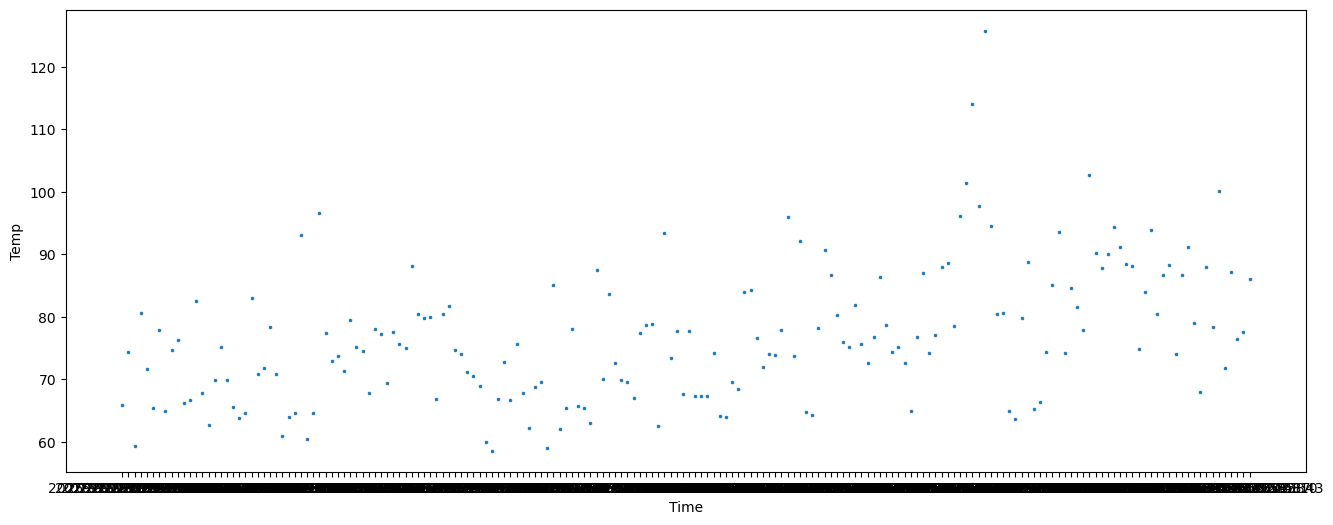

In [130]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Time', y='Temp', data=df_final, marker=".");